# TP Pandas

### 1. Importer le dataset Iris et afficher les 5 premières lignes.

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets

def load_data(file_path):
    return pd.read_csv(file_path, header=None)

# data = load_data('iris/iris.data')

data = datasets.load_iris()
data = pd.DataFrame(data=data.data, columns=data.feature_names)
data['class'] = datasets.load_iris().target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2. Afficher les dimensions du jeu de données et la description statistique (`describe()`).

In [14]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 3. Renommer les colonnes avec des noms plus explicites (ex. `SepalLengthCm`).

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class


In [15]:
data.rename(columns={"sepal length (cm)": 'SepalLengthCm', "sepal width (cm)": 'SepalWidthCm', "petal length (cm)": 'PetalLengthCm', "petal width (cm)": 'PetalWidthCm', "class": 'Class'}, inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 4. Ajouter une colonne qui calcule le rapport longueur/largeur des pétales.

In [16]:
data["RatioLengthWidth"] = data["PetalLengthCm"] / data["PetalWidthCm"] 
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class,RatioLengthWidth
0,5.1,3.5,1.4,0.2,0,7.0
1,4.9,3.0,1.4,0.2,0,7.0
2,4.7,3.2,1.3,0.2,0,6.5
3,4.6,3.1,1.5,0.2,0,7.5
4,5.0,3.6,1.4,0.2,0,7.0


### 5. Supprimer une colonne inutile de votre choix.

In [17]:
data.drop(columns=['RatioLengthWidth'], inplace=True)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 6. Supprimer toutes les lignes où la longueur du sépale est inférieure à 5.0.

In [18]:
filtered_data = data[data['SepalLengthCm'] >= 5.0]
filtered_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
7,5.0,3.4,1.5,0.2,0
10,5.4,3.7,1.5,0.2,0


### 7. Filtrer uniquement les lignes correspondant à l’espèce 'setosa'.

In [19]:
filtered_data = data[data['Class'] == 'Iris-setosa']
filtered_data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class


### 8. Compter le nombre d’occurrences de chaque espèce.

In [20]:
data['Class'].value_counts()

Class
0    50
1    50
2    50
Name: count, dtype: int64

### 9. Visualiser : (1) un histogramme d’une variable, (2) un nuage de points entre deux variables, (3) un boxplot comparant les espèces

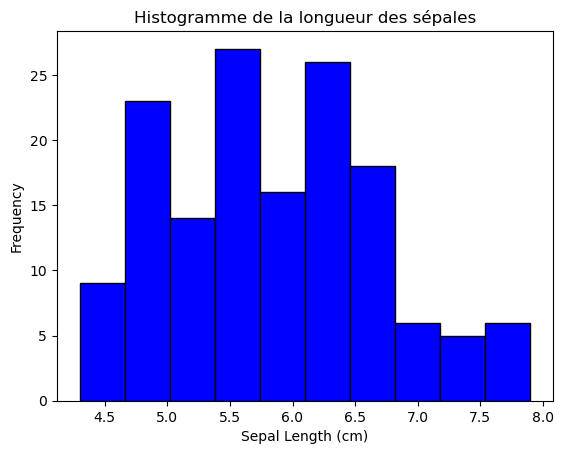

In [21]:
# un histogramme d’une variable
plt.hist(data['SepalLengthCm'], color='blue', edgecolor='black')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogramme de la longueur des sépales')
plt.show()

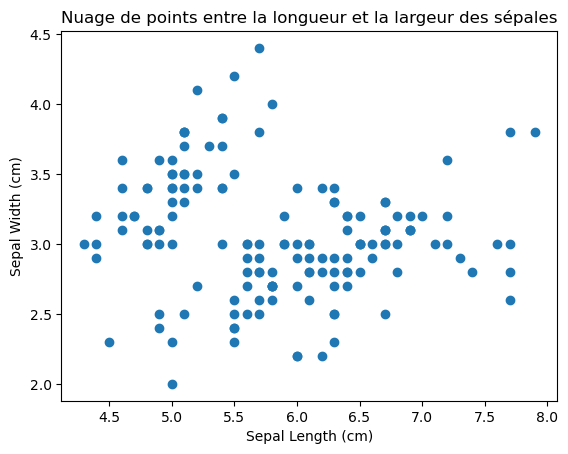

In [22]:
# un nuage de points entre deux variables
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Nuage de points entre la longueur et la largeur des sépales')
plt.show()

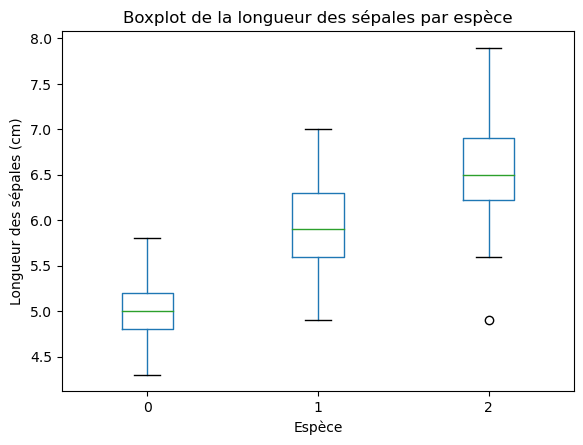

In [23]:
# un boxplot comparant les espèces
data.boxplot(column='SepalLengthCm', by='Class', grid=False)
plt.title('Boxplot de la longueur des sépales par espèce')
plt.suptitle('')
plt.xlabel('Espèce')
plt.ylabel('Longueur des sépales (cm)')
plt.show()